# 概要
状態空間モデルのローカルレベルモデル

In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import urllib
from io import StringIO

ウェブ上のサンプルCSVデータ（ナイル川流量データ）を読み込み

In [30]:
def read_csv(url):
    """
    ウェブ上のファイルを直接読み込む関数
    
    return: df
    """
    print(url)
    res = urllib.request.urlopen(url)
    res=res.read().decode('shift-jis')
    return res

In [12]:
url = "https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/nile/nile.csv"

In [31]:
uritext = read_csv(url)

https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/nile/nile.csv


In [32]:
uritext

'year,volume\n1871,1120\n1872,1160\n1873,963\n1874,1210\n1875,1160\n1876,1160\n1877,813\n1878,1230\n1879,1370\n1880,1140\n1881,995\n1882,935\n1883,1110\n1884,994\n1885,1020\n1886,960\n1887,1180\n1888,799\n1889,958\n1890,1140\n1891,1100\n1892,1210\n1893,1150\n1894,1250\n1895,1260\n1896,1220\n1897,1030\n1898,1100\n1899,774\n1900,840\n1901,874\n1902,694\n1903,940\n1904,833\n1905,701\n1906,916\n1907,692\n1908,1020\n1909,1050\n1910,969\n1911,831\n1912,726\n1913,456\n1914,824\n1915,702\n1916,1120\n1917,1100\n1918,832\n1919,764\n1920,821\n1921,768\n1922,845\n1923,864\n1924,862\n1925,698\n1926,845\n1927,744\n1928,796\n1929,1040\n1930,759\n1931,781\n1932,865\n1933,845\n1934,944\n1935,984\n1936,897\n1937,822\n1938,1010\n1939,771\n1940,676\n1941,649\n1942,846\n1943,812\n1944,742\n1945,801\n1946,1040\n1947,860\n1948,874\n1949,848\n1950,890\n1951,744\n1952,749\n1953,838\n1954,1050\n1955,918\n1956,986\n1957,797\n1958,923\n1959,975\n1960,815\n1961,1020\n1962,906\n1963,901\n1964,1170\n1965,912\n1966,7

時系列インデックスを定義してデータを読み込み

In [20]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y')

In [33]:
df = pd.read_csv(StringIO(uritext), index_col='year', date_parser=dateparse)

In [35]:
df.head(5)

,volume
year,
1871-01-01,1120
1872-01-01,1160
1873-01-01,963
1874-01-01,1210
1875-01-01,1160


### ローカルレベルモデルによる状態推定
* [公式リファレンス(statsmodels.tsa.statespace.structural.UnobservedComponents — statsmodels 0.8.0 documentation](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html)
* カルマンフィルタ（逐次計算アルゴリズム）による最尤推定

In [36]:
model = sm.tsa.UnobservedComponents(data, 'local level')

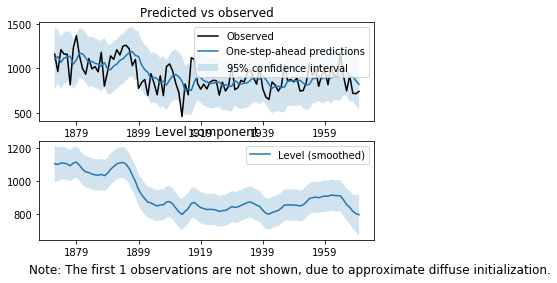

In [37]:
result = model.fit()
fig = result.plot_components()

In [38]:
print(result.summary())

                        Unobserved Components Results                         
Dep. Variable:                 volume   No. Observations:                  100
Model:                    local level   Log Likelihood                -632.538
Date:                Thu, 19 Jul 2018   AIC                           1269.076
Time:                        09:59:47   BIC                           1274.286
Sample:                    01-01-1871   HQIC                          1271.184
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.508e+04   2586.506      5.829      0.000       1e+04    2.01e+04
sigma2.level      1478.8117    851.329      1.737      0.082    -189.762    3147.385
Ljung-Box (Q):              